In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

In [32]:
# fortran compile
compile_command = "gfortran -o test2.exe dvode_f90_m.F90 master_module.F90 zdplaskin_m.F90 master_code.F90 bolsig_x86_64_g.dll"
run_command = "test2.exe"

In [33]:
# compile 실행
# compile_process = subprocess.run(compile_command, shell=True, check=True)
# print("컴파일 완료")

In [34]:
# try:
#     run_process = subprocess.run(run_command, shell=True, check=True)
#     print("실행 완료")
# except subprocess.CalledProcessError as e:
#     print(f"실행 중 오류 발생: {e}")
#     print(f"표준 출력: {e.stdout}")
#     print(f"표준 에러: {e.stderr}")

In [35]:
conditions_path = 'qt_conditions.txt'

df_cond = pd.read_csv(conditions_path,
                 delim_whitespace=True,
                 header=0)

conditions_columns = ['Time_s', 'Reduced field_Td', 'Gas temperature_K', 'Electron temperature_eV', 'Current density_A/cm2', 'Power density_W/cm3']

df_cond.columns = conditions_columns
df_cond['Electron temperature_eV'] = df_cond['Electron temperature_eV']/11604.518
df_cond['Mean Electron Energy_eV'] = df_cond['Electron temperature_eV']*1.5

In [36]:
df_cond

,Time_s,Reduced field_Td,Gas temperature_K,Electron temperature_eV,Current density_A/cm2,Power density_W/cm3,Mean Electron Energy_eV
0,0.000000e+00,0.0000,400.0,0.000000,0.000000e+00,0.000000e+00,0.000000
1,1.000000e-08,0.0000,400.0,0.034470,0.000000e+00,0.000000e+00,0.051705
2,3.000000e-08,2.1403,400.0,2.393292,5.775300e-14,2.267900e-11,3.589938
3,5.000000e-08,4.2806,400.0,3.219350,7.297500e-14,5.731300e-11,4.829024
4,6.000000e-08,5.3507,400.0,3.382131,8.845200e-14,8.683400e-11,5.073196
...,...,...,...,...,...,...,...
2421,7.935000e-05,70.1270,400.0,4.369247,9.434000e-13,9.842800e-14,6.553870
2422,8.375000e-05,314.3100,400.0,5.918471,3.734500e-12,1.746300e-12,8.877706
2423,8.935000e-05,70.1270,400.0,4.369247,9.434000e-13,9.842800e-14,6.553870
2424,9.375000e-05,314.3100,400.0,5.918471,3.734500e-12,1.746300e-12,8.877706


In [37]:
density_path = 'qt_densities.txt'

df_den = pd.read_csv(density_path,
                 delim_whitespace=True,
                 header=0)

den_list= []

with open('qt_species_list.txt', 'r') as file:
    for line in file:
        den_list.append(line.split()[-1])

density_columns = ['Time_s'] + den_list
df_den.columns = density_columns

In [38]:
df_den

,Time_s,E,AR,AR*,AR^+,E(W),AR(W)*,AR(W)^+
0,0.000000e+00,1.00000,1.834700e+19,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000e-08,0.99992,1.834700e+19,0.000000,0.99992,7.572100e-05,0.000000e+00,7.572100e-05
2,3.000000e-08,0.99476,1.834700e+19,0.000001,0.99476,9.052600e-03,3.173300e-09,9.052600e-03
3,5.000000e-08,0.99295,1.834700e+19,0.047075,0.99295,2.243100e-02,1.847600e-04,2.243100e-02
4,6.000000e-08,0.99260,1.834700e+19,0.212570,0.99260,2.983400e-02,1.150900e-03,2.983400e-02
...,...,...,...,...,...,...,...,...
2421,7.935000e-05,0.99046,1.163200e+13,0.010919,0.99046,3.478900e+16,1.371400e+14,3.478900e+16
2422,8.375000e-05,0.98728,1.163200e+13,0.021102,0.98728,3.478900e+16,1.371400e+14,3.478900e+16
2423,8.935000e-05,0.99046,1.163200e+13,0.010919,0.99046,3.478900e+16,1.371400e+14,3.478900e+16
2424,9.375000e-05,0.98728,1.163200e+13,0.021102,0.98728,3.478900e+16,1.371400e+14,3.478900e+16


c:\Users\USER\.conda\envs\qtplaskin_env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


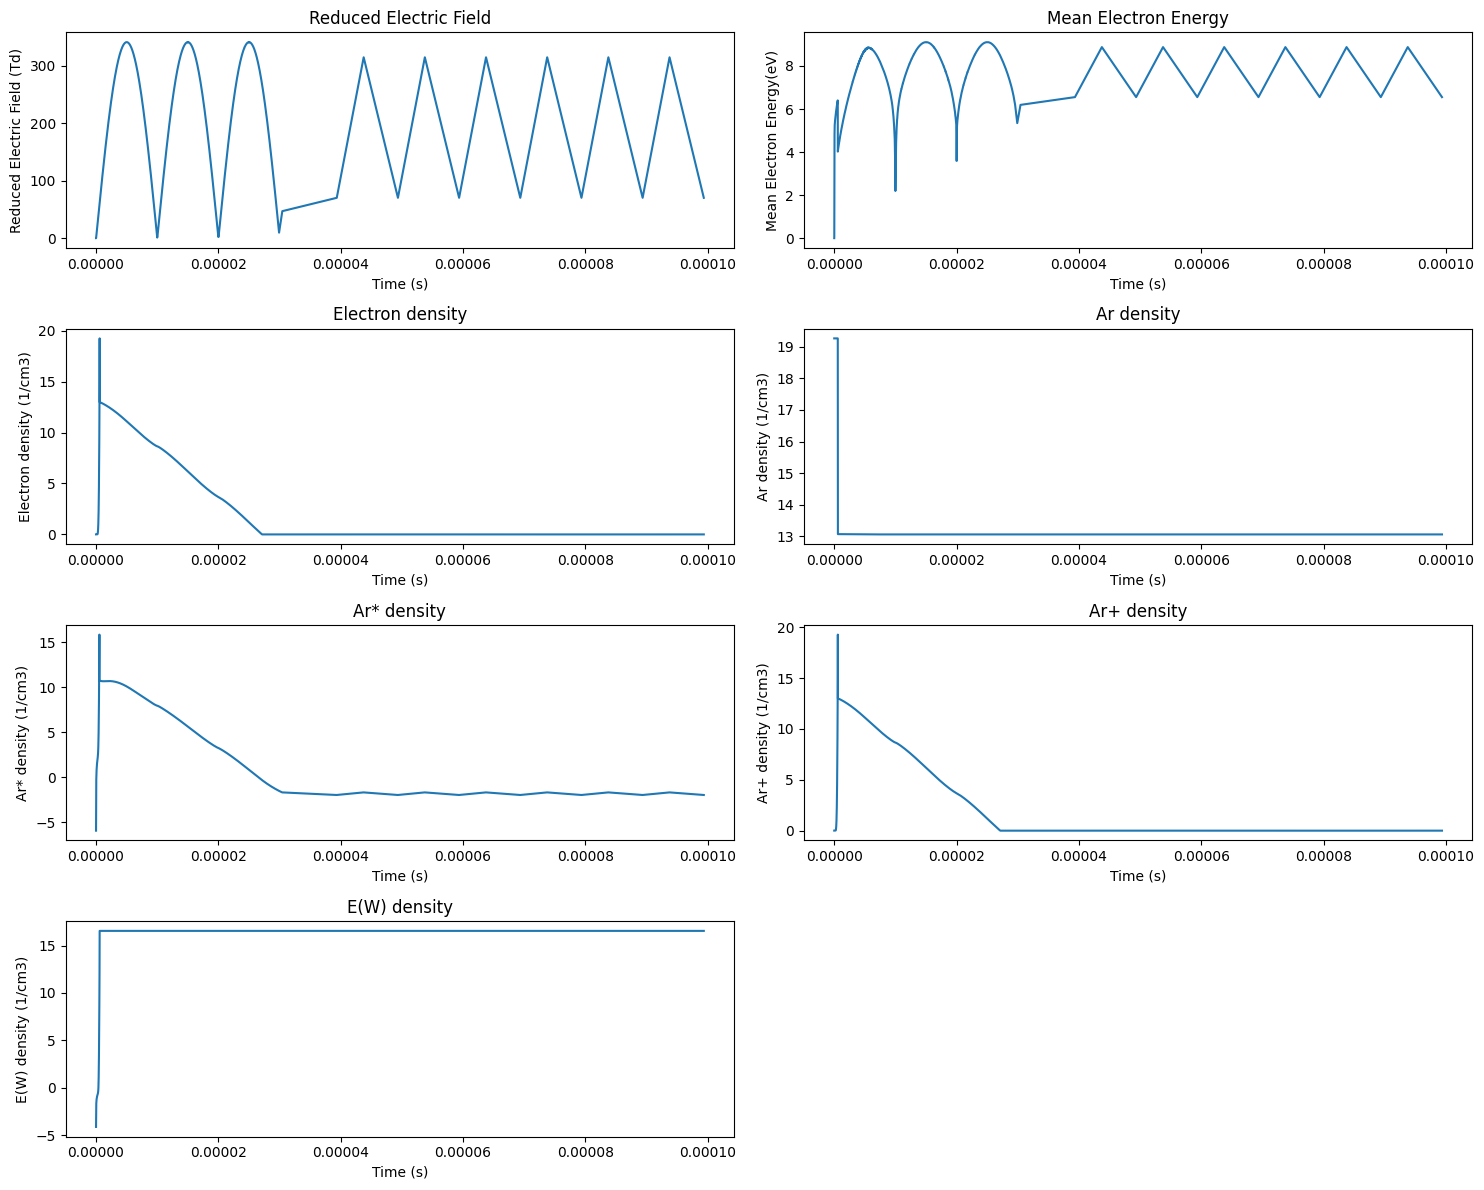

In [39]:
# 결과 플로팅
plt.figure(figsize=(15, 12))

plt.subplot(421)
plt.plot(df_cond['Time_s'], df_cond['Reduced field_Td'])
plt.title('Reduced Electric Field')
plt.xlabel('Time (s)')
plt.ylabel('Reduced Electric Field (Td)')

plt.subplot(422)
plt.plot(df_cond['Time_s'], df_cond['Mean Electron Energy_eV'])
plt.title('Mean Electron Energy')
plt.xlabel('Time (s)')
plt.ylabel('Mean Electron Energy(eV)')

plt.subplot(423)
plt.plot(df_den['Time_s'], np.log10(df_den['E']))
plt.title('Electron density')
plt.xlabel('Time (s)')
plt.ylabel('Electron density (1/cm3)')

plt.subplot(424)
plt.plot(df_den['Time_s'], np.log10(df_den['AR']))
plt.title('Ar density')
plt.xlabel('Time (s)')
plt.ylabel('Ar density (1/cm3)')

plt.subplot(425)
plt.plot(df_den['Time_s'], np.log10(df_den['AR*']))
plt.title('Ar* density')
plt.xlabel('Time (s)')
plt.ylabel('Ar* density (1/cm3)')

plt.subplot(426)
plt.plot(df_den['Time_s'], np.log10(df_den['AR^+']))
plt.title('Ar+ density')
plt.xlabel('Time (s)')
plt.ylabel('Ar+ density (1/cm3)')

plt.subplot(427)
plt.plot(df_den['Time_s'], np.log10(df_den['E(W)']))
plt.title('E(W) density')
plt.xlabel('Time (s)')
plt.ylabel('E(W) density (1/cm3)')

plt.tight_layout()
plt.show()

In [40]:
df.columns

NameError: name 'df' is not defined